In [10]:
#other to do, validity criteria
#davies-bouldin-index, #dunn index, #Gap statistics
#Clustering and Validation
#!pip install --upgrade "ipython[all]"
import pandas as pd
import numpy as np
from sklearn import cluster 
import matplotlib.pyplot as plt
%matplotlib inline 
import os
from pandas.compat import StringIO
os.getcwd()

'/Users/Wizard/Canopy/Myprojects/Clustering'

In [11]:
#df = pd.read_csv('GitHub/Kaggle/RussianReal_estate/test/train.csv')
df = pd.read_csv('Test/HR.csv')
df_left = df[df.left==1]
df_sat = df[df.left==0]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


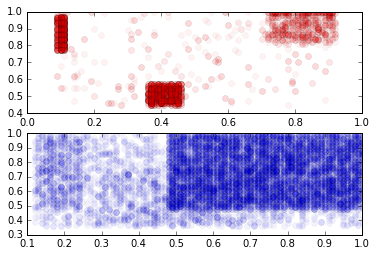

In [12]:
#scatter plot
plt.subplot(2,1,1)
plt.plot(df_left.satisfaction_level, df_left.last_evaluation, 'o', color= 'r', alpha=0.05)
plt.subplot(2,1,2)
plt.plot(df_sat.satisfaction_level, df_sat.last_evaluation, 'o', color= 'b', alpha=0.05)
plt.show()

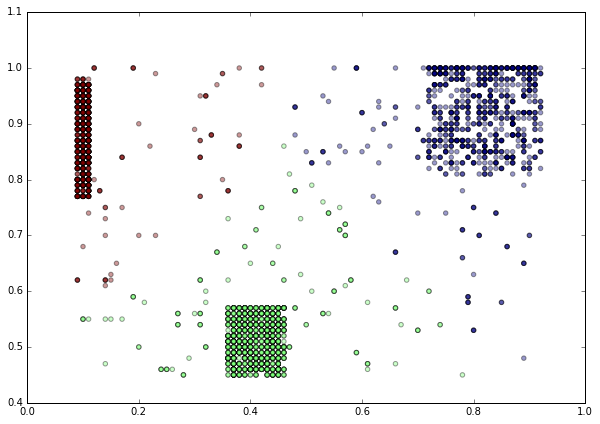

In [13]:
#clustering using K-Means
df_cleft=  df_left.drop([ u'number_project',u'average_montly_hours', u'time_spend_company', u'left',\
            u'Work_accident', u'promotion_last_5years', u'sales', u'salary'],axis = 1)
df_cleft.head()
df_cleft['label'] = cluster.KMeans(n_clusters=3, max_iter=300, algorithm='auto').fit(df_cleft).labels_
plt.figure(figsize= (10,7))
plt.scatter(df_cleft.satisfaction_level, df_cleft.last_evaluation, c=df_cleft.label, alpha=.4)

In [73]:
#Clustering Validation, 
#method1 Elbow -- Cdist method
import scipy
from scipy.spatial.distance import cdist
from sklearn import metrics
meandistortions = []
K = range(2, 11)
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300).fit(df_cleft)
    meandistortions.append(sum(np.min(cdist(df_cleft, kmeans.cluster_centers_, 'euclidean'), axis=1)))

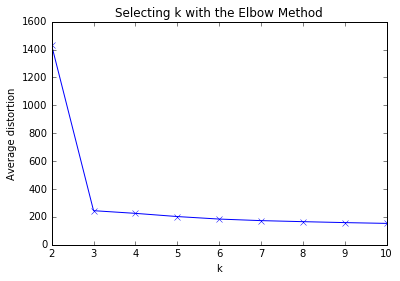

In [74]:
#Elbow plot, Kmeans
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [13]:
#other to do, validity criteria
#davies-bouldin-index
#----http://stackoverflow.com/questions/4919962/davies-bouldin-index
#dunn index
#----https://gist.github.com/douglasrizzo/cd7e792ff3a2dcaf27f6
#Gap statistics
#----https://gist.github.com/michiexile/5635273
#check later
#----http://etetoolkit.org/docs/2.3/tutorial/tutorial_clustering.html#cluster-validation-example

In [69]:
#test
from scipy.spatial.distance import cdist, pdist
a = [[3,5,7],[5,7,4],[5,7,1]]
np.min(cdist(a,a,'euclidean'), axis=1)

array([ 0.,  0.,  0.])

In [75]:
#method 4, davies-bouldin-index, Dunn
#http://stackoverflow.com/questions/4919962/davies-bouldin-index-in-java

In [ ]:
#dunn index
#intercluster distance and intra custer distance
#Gap method
#Intra cluster distance comparison with Null system distance 